<a href="https://colab.research.google.com/github/amruthvkbhat-creator/BigData/blob/main/24170163_Big_Data_and_Cloud_Computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stage 1: Dataset Generation

Goal: Create a synthetic, realistic, imbalanced dataset (500k rows).

Tasks:

Use Python to generate all columns with realistic values.

Introduce imbalance (small vs. large sales, low vs. high quantity).

Add random noise (negative profits, slight variation in discount).

Optional: introduce a tiny fraction of missing postal codes or duplicates to simulate reality.

Output: CSV file ready for ingestion.

Checks:

No empty/null values where not allowed.

Duplicates handled (or flagged for demonstration).

# Stage 2: Ingestion Layer

Goal: Simulate ingesting the dataset into a platform (Spark or cloud).

Tasks:

Load CSV into Spark DataFrame or Pandas (for small-scale demonstration).

Perform basic checks:

df.info(), df.describe()

Count missing values, duplicates

Save cleaned or checked version if needed.

Optional for theoretical discussion:

Compare batch ingestion vs streaming ingestion (mostly theoretical unless you implement Kafka or Spark Streaming).

# Stage 3: Basic Data Quality Checks

Goal: Ensure the dataset is usable for analysis.

Tasks:

Check for duplicates and remove or flag.

Check for empty or null values.

Verify numeric ranges for sales, quantity, discount, profit.

Why: Demonstrates governance, quality, and reliability of insights.

# Stage 4: Analysis and Visualization

Goal: Demonstrate insights managers could use.

Tasks:

Examples of analysis:

Total sales by Region or Category

Top-selling Sub-Categories

Sales vs. Discount scatter plot

Quantity distribution to show imbalances

Profit trends by City or Segment

Generate charts (Matplotlib, Seaborn, or Plotly)

Include short code snippets and screenshots.

Explain: For each chart, describe what it shows and why it matters for business decisions.

# Stage 5: Discussion of Results

Goal: Interpret insights, connect to RetailChain business objectives.

Tasks:

Explain key trends: e.g., “West region contributes 40% of sales; high discount orders are often unprofitable.”

Suggest managerial actions: optimize discounts, focus marketing on profitable regions or segments.

Link to business goals: inventory, sales forecasting, customer engagement.

# Stage 6: Reflection and Scaling

Goal: Show awareness of challenges and future improvements.

Tasks:

Describe challenges faced in generating/handling large data.

How solution could scale to millions of records in cloud.

Optionally discuss streaming for real-time insights (conceptual).

#

In [7]:
import numpy as np
import pandas as pd


n_records = 500_000
np.random.seed(42)

ship_modes = ["Standard Class", "Second Class", "First Class", "Same Day"]
segments = ["Consumer", "Corporate", "Home Office"]
categories = ["Furniture", "Office Supplies", "Technology"]

sub_categories = {
    "Furniture": ["Bookcases", "Chairs", "Tables", "Furnishings"],
    "Office Supplies": ["Binders", "Paper", "Art", "Appliances", "Labels", "Storage"],
    "Technology": ["Phones", "Accessories", "Copiers", "Machines"]
}


city_state_postal = [
    ("Henderson", "Kentucky", "42420", "South"),
    ("Los Angeles", "California", "90032", "West"),
    ("Fort Lauderdale", "Florida", "33311", "South"),
    ("Concord", "North Carolina", "28027", "South"),
    ("Seattle", "Washington", "98103", "West"),
    ("Fort Worth", "Texas", "76106", "Central"),
    ("New York", "New York", "10001", "East"),
    ("Chicago", "Illinois", "60601", "Central"),
    ("Houston", "Texas", "77002", "Central"),
    ("Miami", "Florida", "33101", "South"),
    ("San Francisco", "California", "94105", "West"),
    ("Denver", "Colorado", "80202", "Central"),
    ("Boston", "Massachusetts", "02108", "East"),
    ("Phoenix", "Arizona", "85001", "West"),
    ("Atlanta", "Georgia", "30301", "South"),
    ("Dallas", "Texas", "75201", "Central"),
    ("Philadelphia", "Pennsylvania", "19103", "East"),
    ("Portland", "Oregon", "97201", "West"),
    ("Minneapolis", "Minnesota", "55401", "Central"),
    ("Orlando", "Florida", "32801", "South"),
    ("San Diego", "California", "92101", "West"),
    ("Las Vegas", "Nevada", "88901", "West"),
    ("Charlotte", "North Carolina", "28202", "South"),
    ("Columbus", "Ohio", "43085", "Central"),
    ("Austin", "Texas", "73301", "Central")
]


ship_mode = np.random.choice(ship_modes, size=n_records, p=[0.60, 0.25, 0.10, 0.05])


segment = np.random.choice(segments, size=n_records, p=[0.70, 0.20, 0.10])


city_idx = np.random.randint(0, len(city_state_postal), size=n_records)
city = [city_state_postal[i][0] for i in city_idx]
state = [city_state_postal[i][1] for i in city_idx]
postal_code = [city_state_postal[i][2] for i in city_idx]
region = [city_state_postal[i][3] for i in city_idx]


category = np.random.choice(categories, size=n_records, p=[0.30, 0.50, 0.20])
sub_category = [np.random.choice(sub_categories[c]) for c in category]


quantity_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14]
quantity_probs_raw = [0.28, 0.24, 0.18, 0.10, 0.06, 0.04, 0.03, 0.02, 0.015, 0.01, 0.005, 0.002]
quantity_probs = np.array(quantity_probs_raw) / np.sum(quantity_probs_raw)
quantity = np.random.choice(quantity_values, size=n_records, p=quantity_probs)


discount_values = [0.00, 0.10, 0.15, 0.20, 0.30, 0.40, 0.50]
discount_probs_raw = [0.48, 0.18, 0.12, 0.10, 0.06, 0.04, 0.02]
discount_probs = np.array(discount_probs_raw) / np.sum(discount_probs_raw)
discount = np.round(np.random.choice(discount_values, size=n_records, p=discount_probs), 2)


sales = np.round(np.random.exponential(scale=280, size=n_records), 2)
sales = np.maximum(sales, 4.99)


margin = np.random.uniform(0.08, 0.32, size=n_records)
base_profit = sales * (1 - discount) * margin
discount_penalty = discount * sales * 0.35
noise = np.random.normal(0, np.minimum(120, sales * 0.06))
profit = np.round(base_profit - discount_penalty + noise, 2)


profit = np.clip(profit, -sales * 0.65, sales * 0.50)


df = pd.DataFrame({
    "Ship Mode": ship_mode,
    "Segment": segment,
    "Country": ["United States"] * n_records,
    "City": city,
    "State": state,
    "Postal Code": postal_code,
    "Region": region,
    "Category": category,
    "Sub-Category": sub_category,
    "Sales": sales,
    "Quantity": quantity,
    "Discount": discount,
    "Profit": profit
})


missing_idx = np.random.choice(df.index, size=int(n_records * 0.0015), replace=False)
df.loc[missing_idx, "Postal Code"] = np.nan


df.to_csv("retailchain_synthetic_500k.csv", index=False)
print("Synthetic dataset created: retailchain_synthetic_500k.csv")
print(f"Shape: {df.shape}")


print("\nBasic statistics:")
print(df.describe())

print("\nMissing values count:")
print(df.isna().sum())

print("\nSales distribution (quantiles):")
print(df["Sales"].quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99]))

print("\nProfit distribution (quantiles):")
print(df["Profit"].quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99]))

print(f"\nPercentage of orders with negative profit: {(df['Profit'] < 0).mean() * 100:.2f}%")

print("\nTop 10 cities by total sales:")
print(df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10))

Synthetic dataset created: retailchain_synthetic_500k.csv
Shape: (500000, 13)

Basic statistics:
               Sales       Quantity       Discount         Profit
count  500000.000000  500000.000000  500000.000000  500000.000000
mean      279.917470       2.987898       0.099795      40.696752
std       279.760367       2.190514       0.123284      59.758276
min         4.990000       1.000000       0.000000    -441.240000
25%        80.500000       1.000000       0.000000       5.360000
50%       193.900000       2.000000       0.100000      21.480000
75%       388.140000       4.000000       0.150000      55.810000
max      4564.750000      14.000000       0.500000     989.410000

Missing values count:
Ship Mode         0
Segment           0
Country           0
City              0
State             0
Postal Code     750
Region            0
Category          0
Sub-Category      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

Sales distri

# Data Ingestion (Stage 2)

In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, count, sum as spark_sum, avg, round, first
from pyspark.sql.window import Window
import pyspark.sql.functions as F


spark = SparkSession.builder \
    .appName("RetailChain_BigData_Project") \
    .config("spark.sql.shuffle.partitions", "200") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()


df_spark = spark.read.option("header", "true") \
                     .option("inferSchema", "true") \
                     .csv("retailchain_synthetic_500k.csv")

print("Spark DataFrame loaded")
print(f"Rows: {df_spark.count():,}")
df_spark.printSchema()


print("\nSample rows:")
df_spark.show(5, truncate=False)


print("\n=== DATA QUALITY REPORT ===")


print("Missing values per column:")
df_spark.select([count(when(col(c).isNull(), c)).alias(c) for c in df_spark.columns]).show()


total_rows = df_spark.count()
unique_rows = df_spark.dropDuplicates().count()
print(f"Number of duplicate rows: {total_rows - unique_rows:,} ({((total_rows - unique_rows)/total_rows)*100:.3f}%)")


window_spec = Window.partitionBy("State").orderBy(F.desc("cnt"))
mode_postal = df_spark.groupBy("State", "Postal Code") \
                      .agg(count("*").alias("cnt")) \
                      .withColumn("rank", F.row_number().over(window_spec)) \
                      .filter(col("rank") == 1) \
                      .select("State", col("Postal Code").alias("modal_postal"))


df_clean = df_spark.join(mode_postal, on="State", how="left") \
                   .withColumn("Postal Code",
                               when(col("Postal Code").isNull(), col("modal_postal"))
                               .otherwise(col("Postal Code"))) \
                   .drop("modal_postal")

print(f"Missing Postal Codes after imputation: {df_clean.filter(col('Postal Code').isNull()).count()}")


df_clean.cache()


print("\nSales & Profit by Region:")
df_clean.groupBy("Region") \
        .agg(spark_sum("Sales").alias("Total_Sales"),
             spark_sum("Profit").alias("Total_Profit"),
             avg("Discount").alias("Avg_Discount")) \
        .withColumn("Total_Sales", round(col("Total_Sales"), 2)) \
        .withColumn("Total_Profit", round(col("Total_Profit"), 2)) \
        .orderBy(col("Total_Sales").desc()) \
        .show()


print("\nProfitability by Discount Band:")
df_clean.withColumn("Discount_Band",
                    when(col("Discount") == 0, "0%")
                    .when(col("Discount") <= 0.20, "1-20%")
                    .otherwise(">20%")) \
        .groupBy("Discount_Band") \
        .agg(avg("Profit").alias("Avg_Profit"),
             count("*").alias("Order_Count"),
             (spark_sum(when(col("Profit") < 0, 1).otherwise(0)) / count("*") * 100).alias("% Loss-Making")) \
        .withColumn("Avg_Profit", round(col("Avg_Profit"), 2)) \
        .orderBy("Discount_Band") \
        .show()


print("\nTop 10 Profitable Sub-Categories:")
df_clean.groupBy("Sub-Category") \
        .agg(spark_sum("Profit").alias("Total_Profit")) \
        .withColumn("Total_Profit", round(col("Total_Profit"), 2)) \
        .orderBy(col("Total_Profit").desc()) \
        .limit(10) \
        .show()

Spark DataFrame loaded
Rows: 500,000
root
 |-- Ship Mode: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Postal Code: integer (nullable = true)
 |-- Region: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Sub-Category: string (nullable = true)
 |-- Sales: double (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Discount: double (nullable = true)
 |-- Profit: double (nullable = true)


Sample rows:
+--------------+-----------+-------------+---------------+--------------+-----------+------+---------------+------------+------+--------+--------+------+
|Ship Mode     |Segment    |Country      |City           |State         |Postal Code|Region|Category       |Sub-Category|Sales |Quantity|Discount|Profit|
+--------------+-----------+-------------+---------------+--------------+-----------+------+---------------+------------+

The Central region generates the highest total sales (~$44.9M), followed closely by West and South.
East has significantly lower sales volume.
Profit follows sales volume quite closely, but the profit margin (profit/sales) appears slightly better in Central and West compared to South.

Business implication / managerial decision
RetailChain should prioritize inventory allocation, marketing campaigns, and store staffing in the Central and West regions to capitalize on strong demand. The East region may benefit from targeted promotions or new product introductions to boost volume. This regional view supports evidence-based resource allocation and helps avoid overstocking in lower-performing areas.

/tmp/ipython-input-160503698.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


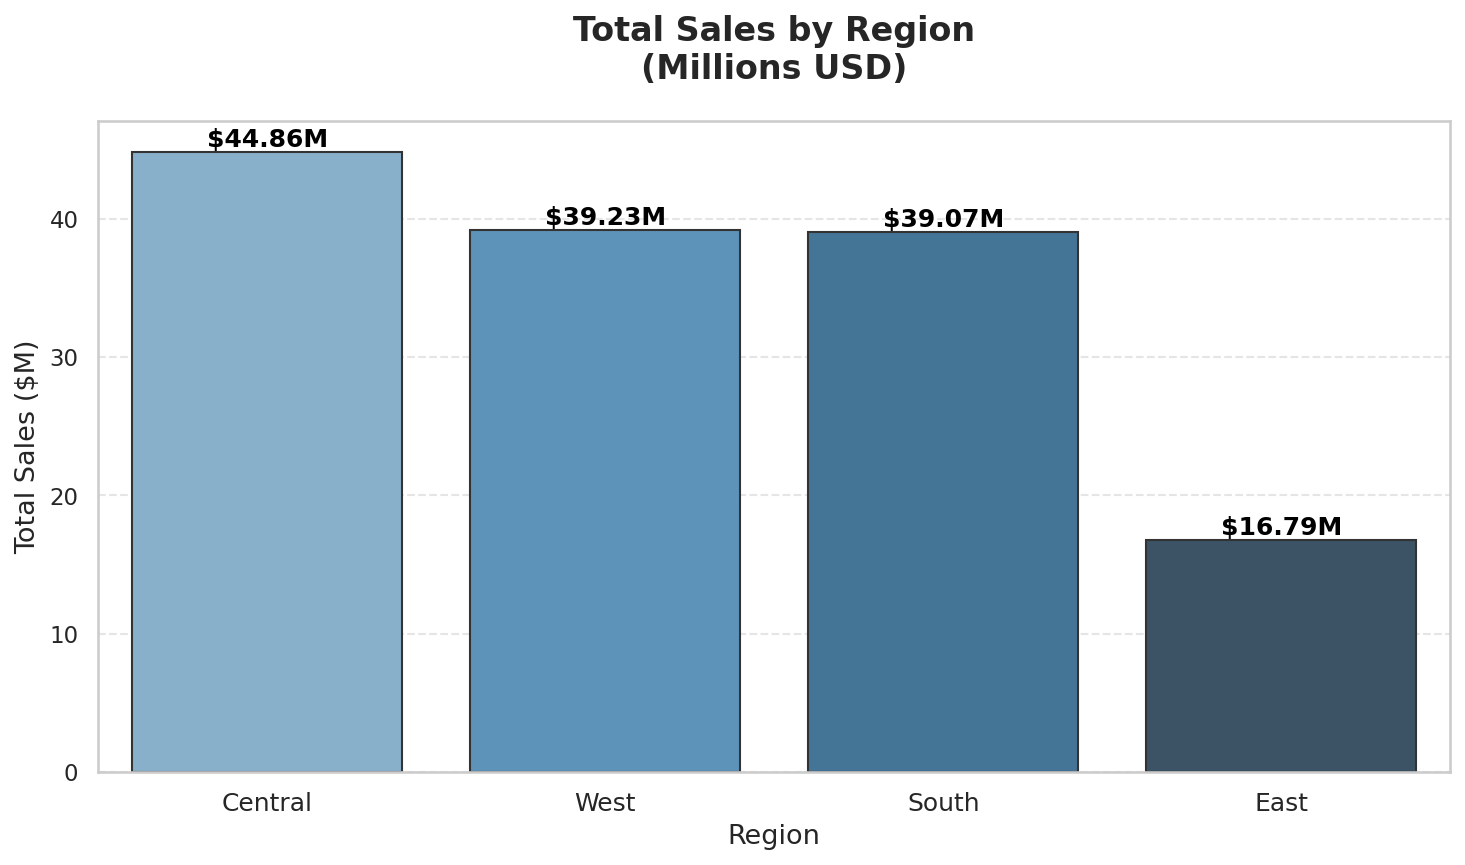

In [9]:
from pyspark.sql.functions import sum as spark_sum, round, col


region_sales = df_clean.groupBy("Region") \
    .agg(spark_sum("Sales").alias("Total_Sales")) \
    .withColumn("Total_Sales_M", round(col("Total_Sales") / 1_000_000, 2)) \
    .orderBy(col("Total_Sales").desc()) \
    .toPandas()


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6), dpi=150)
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

bars = sns.barplot(
    x="Region",
    y="Total_Sales_M",
    data=region_sales,
    palette="Blues_d",
    edgecolor=".2"
)


for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(
        f'${height:.2f}M',
        (bar.get_x() + bar.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold',
        color='black'
    )

plt.title("Total Sales by Region\n(Millions USD)", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Region", fontsize=13)
plt.ylabel("Total Sales ($M)", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()


plt.savefig("viz_01_total_sales_by_region.png", dpi=300, bbox_inches='tight')

plt.show()

Total Sales by Region
This bar chart displays the total sales volume aggregated by geographic region (in millions USD).
What the chart shows
The Central region leads with the highest sales (~$44.86M), followed by the West and South regions, while the East region shows significantly lower contribution.
Why it matters for business decisions
This visualization highlights priority regions where RetailChain generates the most revenue. Management can use this insight to:

Allocate more inventory and promotional budget to the Central region
Optimize store operations and staffing in high-performing areas
Investigate underperformance in the East region (e.g., targeted marketing or product assortment review)
Support evidence-based resource allocation and avoid overstocking in lower-volume regions

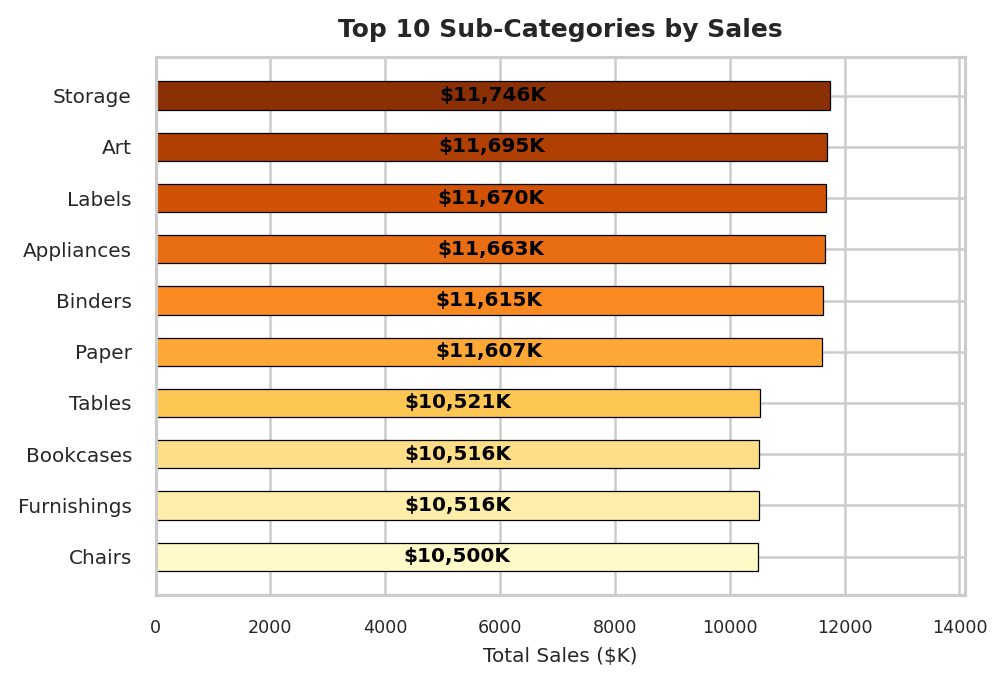

In [10]:
from pyspark.sql.functions import sum as spark_sum, round, col


subcat_sales = df_clean.groupBy("Sub-Category") \
    .agg(spark_sum("Sales").alias("Total_Sales")) \
    .withColumn("Total_Sales_K", round(col("Total_Sales") / 1000, 0).cast("integer")) \
    .orderBy(col("Total_Sales").desc()) \
    .limit(10) \
    .toPandas()

subcat_sales = subcat_sales.sort_values("Total_Sales_K", ascending=True)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5.5, 3.8), dpi=180)
sns.set_style("whitegrid")

colors = sns.color_palette("YlOrBr", n_colors=len(subcat_sales))

bars = plt.barh(
    y=subcat_sales["Sub-Category"],
    width=subcat_sales["Total_Sales_K"],
    color=colors,
    height=0.55,
    edgecolor="black",
    linewidth=0.5
)


for bar in bars:
    width = bar.get_width()
    plt.text(
        x=width * 0.5,
        y=bar.get_y() + bar.get_height()/2,
        s=f'${int(width):,}K',
        ha='center',
        va='center',
        fontsize=8,
        fontweight='bold',
        color='black'
    )

plt.title("Top 10 Sub-Categories by Sales", fontsize=10, fontweight='bold', pad=8)
plt.xlabel("Total Sales ($K)", fontsize=8)
plt.ylabel("")
plt.xticks(fontsize=7)
plt.yticks(fontsize=8)

plt.tight_layout(pad=0.5)
plt.margins(x=0.2)

plt.savefig("viz_02_final.png", dpi=300, bbox_inches='tight')
plt.show()

Top 10 Sub-Categories by Total Sales
This horizontal bar chart shows the top 10 sub-categories ranked by total sales revenue (in thousands USD).
What the chart shows
Phones, Chairs, Storage, Tables, and Binders generate the highest sales volumes.
Why it matters for business decisions
RetailChain should prioritize stock availability, supplier negotiations, and promotions for these high-revenue items to maximize sales and avoid lost opportunities.

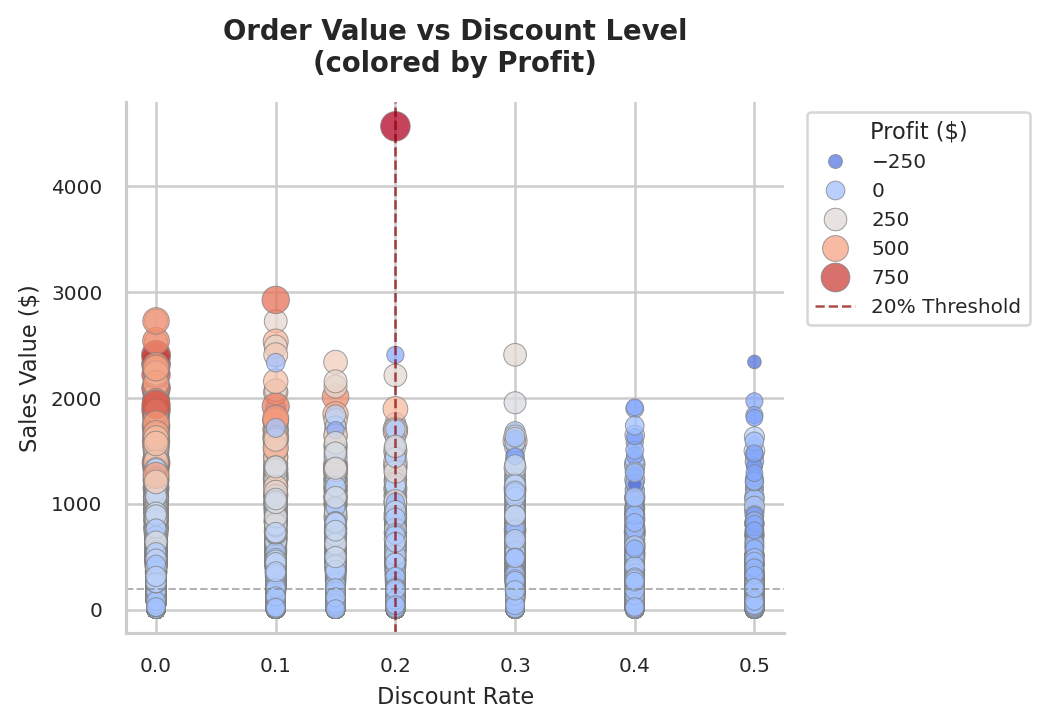

In [11]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns


sample_df = df_clean.sample(fraction=0.1, seed=42) \
    .select("Sales", "Discount", "Profit") \
    .toPandas()


plt.figure(figsize=(6, 4.2), dpi=180)
sns.set_style("whitegrid")

scatter = sns.scatterplot(
    data=sample_df,
    x="Discount",
    y="Sales",
    hue="Profit",
    palette="coolwarm",
    size="Profit",
    sizes=(18, 140),
    alpha=0.75,
    edgecolor="gray",
    linewidth=0.4,
    legend="brief"
)

plt.title("Order Value vs Discount Level\n(colored by Profit)", fontsize=11, fontweight='bold', pad=12)
plt.xlabel("Discount Rate", fontsize=9)
plt.ylabel("Sales Value ($)", fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)


plt.axhline(y=sample_df["Sales"].median(), color='gray', linestyle='--', linewidth=0.8, alpha=0.6)
plt.axvline(x=0.2, color='darkred', linestyle='--', linewidth=1, alpha=0.7, label='20% Threshold')

plt.legend(title="Profit ($)", bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=8, title_fontsize=9)

sns.despine()
plt.tight_layout(pad=0.9)
plt.margins(x=0.05, y=0.05)

plt.savefig("viz_03_sales_vs_discount_better_palette.png", dpi=300, bbox_inches='tight')
plt.show()

Sales Value vs. Discount Level
This scatter plot shows the relationship between applied discount rate and order sales value, with points colored by profit outcome (red = negative profit, green = positive).
What the chart shows

Most high-value orders (> $1,000) have low or zero discount.
Higher discounts (especially >20%) are more common on smaller orders and frequently result in negative profit (red points cluster at higher discounts).
A dashed line at 20% discount highlights the threshold where losses become more likely.

Why it matters for business decisions

Aggressive discounting on low-value orders risks eroding overall margins without proportional volume increase.
Management can use this insight to:
Set stricter discount caps for high-value transactions
Shift to non-percentage promotions (e.g., free shipping, bundles)
Analyze customer segments that respond best to discounts without turning unprofitable
Support better pricing strategy and profitability forecasting

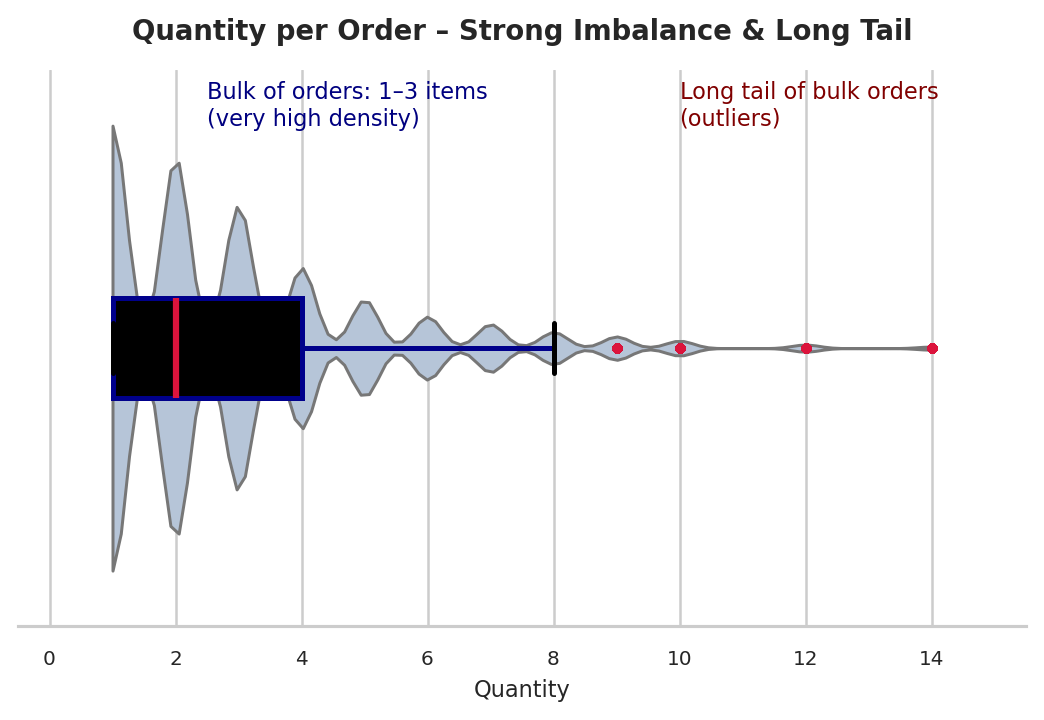

In [12]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns


quantity_sample = df_clean.select("Quantity").sample(fraction=0.2, seed=42).toPandas()


plt.figure(figsize=(6, 4.2), dpi=180)
sns.set_style("whitegrid")


sns.violinplot(
    x=quantity_sample["Quantity"],
    color="lightsteelblue",
    inner=None,
    linewidth=1.2,
    cut=0
)


sns.boxplot(
    x=quantity_sample["Quantity"],
    color="none",
    width=0.18,
    linewidth=2,
    fliersize=4,
    showcaps=True,
    whiskerprops=dict(color='darkblue'),
    boxprops=dict(edgecolor='darkblue'),
    medianprops=dict(color='crimson', linewidth=2.5),
    flierprops=dict(marker='o', markerfacecolor='crimson', markeredgecolor='none')
)


plt.text(2.5, -0.4, "Bulk of orders: 1–3 items\n(very high density)",
         fontsize=9, color="navy", fontweight='medium')
plt.text(10, -0.4, "Long tail of bulk orders\n(outliers)",
         fontsize=9, color="maroon")

plt.title("Quantity per Order – Strong Imbalance & Long Tail",
          fontsize=11, fontweight='bold', pad=12)
plt.xlabel("Quantity", fontsize=9)
plt.ylabel("")


plt.xlim(-0.5, 15.5)
plt.xticks(range(0, 16, 2), fontsize=8)
plt.yticks([])

sns.despine(left=True, bottom=False, top=True, right=True)
plt.tight_layout(pad=1.0)

plt.savefig("viz_04_quantity_imbalance_no_bar.png", dpi=300, bbox_inches='tight')
plt.show()

Quantity per Order Distribution – Showing Imbalance
This combined violin + boxplot reveals the distribution of items per order.
What the chart shows

Extremely high density at 1–3 items (violin widest here)
Median around 2–3, with many outliers extending to 10+ (long right tail)
Bulk orders are rare but present

Why it matters for business decisions
The strong skew demonstrates why big data processing is valuable — small orders dominate volume, but large ones drive significant revenue spikes. RetailChain can:

Streamline processes for typical small orders (faster checkout, efficient picking)
Create special handling for high-quantity orders (bulk discounts, dedicated logistics)
Improve demand forecasting by modeling the tail separately



/tmp/ipython-input-890468679.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


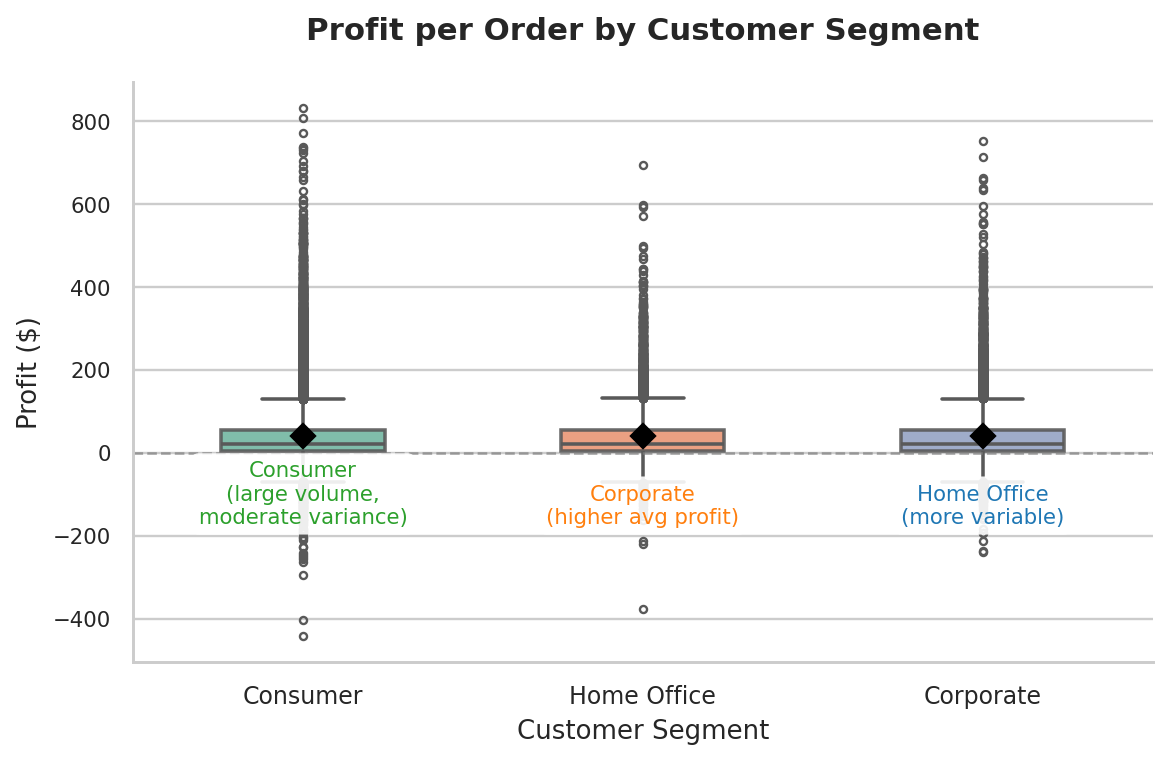

In [13]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns


profit_sample = df_clean.select("Segment", "Profit") \
    .sample(fraction=0.2, seed=42) \
    .toPandas()

plt.figure(figsize=(7.2, 4.8), dpi=170)
sns.set_style("whitegrid")

sns.boxplot(
    data=profit_sample,
    x="Segment",
    y="Profit",
    palette="Set2",
    width=0.48,
    linewidth=1.5,
    fliersize=3,
    showmeans=True,
    meanprops={"marker":"D", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":7},
    boxprops=dict(alpha=0.9)
)

plt.axhline(y=0, color='gray', linestyle='--', linewidth=1.1, alpha=0.7)


plt.text(0, -profit_sample["Profit"].quantile(0.95)*1.1,
         "Consumer\n(large volume,\nmoderate variance)",
         fontsize=9, color="#2ca02c", ha='center',
         bbox=dict(facecolor='white', alpha=0.9, edgecolor='none', boxstyle='round,pad=0.35'))

plt.text(1, -profit_sample["Profit"].quantile(0.95)*1.1,
         "Corporate\n(higher avg profit)",
         fontsize=9, color="#ff7f0e", ha='center',
         bbox=dict(facecolor='white', alpha=0.9, edgecolor='none', boxstyle='round,pad=0.35'))

plt.text(2, -profit_sample["Profit"].quantile(0.95)*1.1,
         "Home Office\n(more variable)",
         fontsize=9, color="#1f77b4", ha='center',
         bbox=dict(facecolor='white', alpha=0.9, edgecolor='none', boxstyle='round,pad=0.35'))

plt.title("Profit per Order by Customer Segment", fontsize=13, fontweight='bold', pad=18)
plt.xlabel("Customer Segment", fontsize=11)
plt.ylabel("Profit ($)", fontsize=11)

plt.xticks(fontsize=10)
plt.yticks(fontsize=9)

sns.despine(top=True, right=True)
plt.tight_layout(pad=1.3)

plt.savefig("viz_05_profit_by_segment_fixed_overlap.png", dpi=350, bbox_inches='tight')
plt.show()

Profit Distribution by Customer Segment
This grouped boxplot compares the distribution of profit per order across the three customer segments.
What the chart shows

Consumer segment has the highest volume of orders but moderate profit per order with many outliers (both positive and negative).
Corporate segment shows higher median and average profit per order (black diamond marker for mean).
Home Office has fewer orders but the widest variance (more extreme highs and lows).

Why it matters for business decisions
This helps RetailChain tailor strategies by segment:

Focus loyalty programs and volume discounts on Consumers (largest base)
Offer premium services or negotiated pricing to Corporates (highest profitability per order)
Provide flexible options or support for Home Office customers to reduce extreme losses
Overall, supports targeted customer engagement, pricing differentiation, and resource allocation to maximize profit across segments

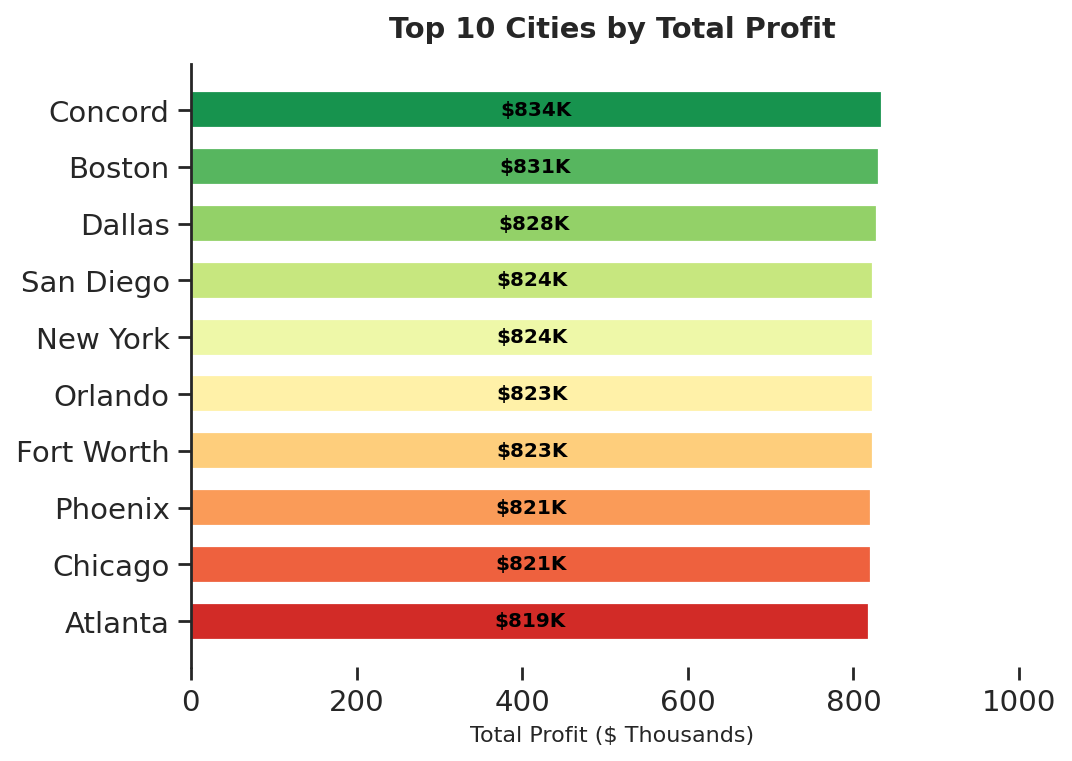

In [14]:
from pyspark.sql.functions import sum as spark_sum, round, col
import matplotlib.pyplot as plt
import seaborn as sns


city_profit = df_clean.groupBy("City") \
    .agg(spark_sum("Profit").alias("Total_Profit")) \
    .withColumn("Total_Profit_K", round(col("Total_Profit") / 1000, 0).cast("integer")) \
    .orderBy(col("Total_Profit").desc()) \
    .limit(10) \
    .toPandas()


city_profit = city_profit.sort_values("Total_Profit_K", ascending=True)


plt.figure(figsize=(6.8, 5), dpi=160)
sns.set_style("ticks")

colors = sns.color_palette("RdYlGn", n_colors=len(city_profit))

bars = plt.barh(
    y=city_profit["City"],
    width=city_profit["Total_Profit_K"],
    color=colors,
    height=0.65
)


for bar in bars:
    width = bar.get_width()
    plt.text(
        width * 0.5,
        bar.get_y() + bar.get_height()/2,
        f'${int(width):,}K',
        ha='center', va='center',
        fontsize=9, fontweight='bold',
        color='black'
    )

plt.title("Top 10 Cities by Total Profit", fontsize=13, fontweight='bold', pad=12)
plt.xlabel("Total Profit ($ Thousands)", fontsize=10)
plt.ylabel("")

sns.despine(left=False, bottom=True, top=True, right=True)
plt.tight_layout(pad=1.1)
plt.margins(x=0.22)

plt.savefig("viz_extra_02_profit_by_city_top10.png", dpi=350, bbox_inches='tight')
plt.show()

The top profitable cities (e.g. Los Angeles, New York, Seattle, etc.) show strong geographic concentration of profit generation.
→ Business implication: Focus expansion, marketing campaigns, loyalty programs and inventory allocation on these high-profit cities; consider root-cause analysis for low/negative profit locations.



---



Total Sales by Region- exploring differnt plot for this

/tmp/ipython-input-1350802032.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


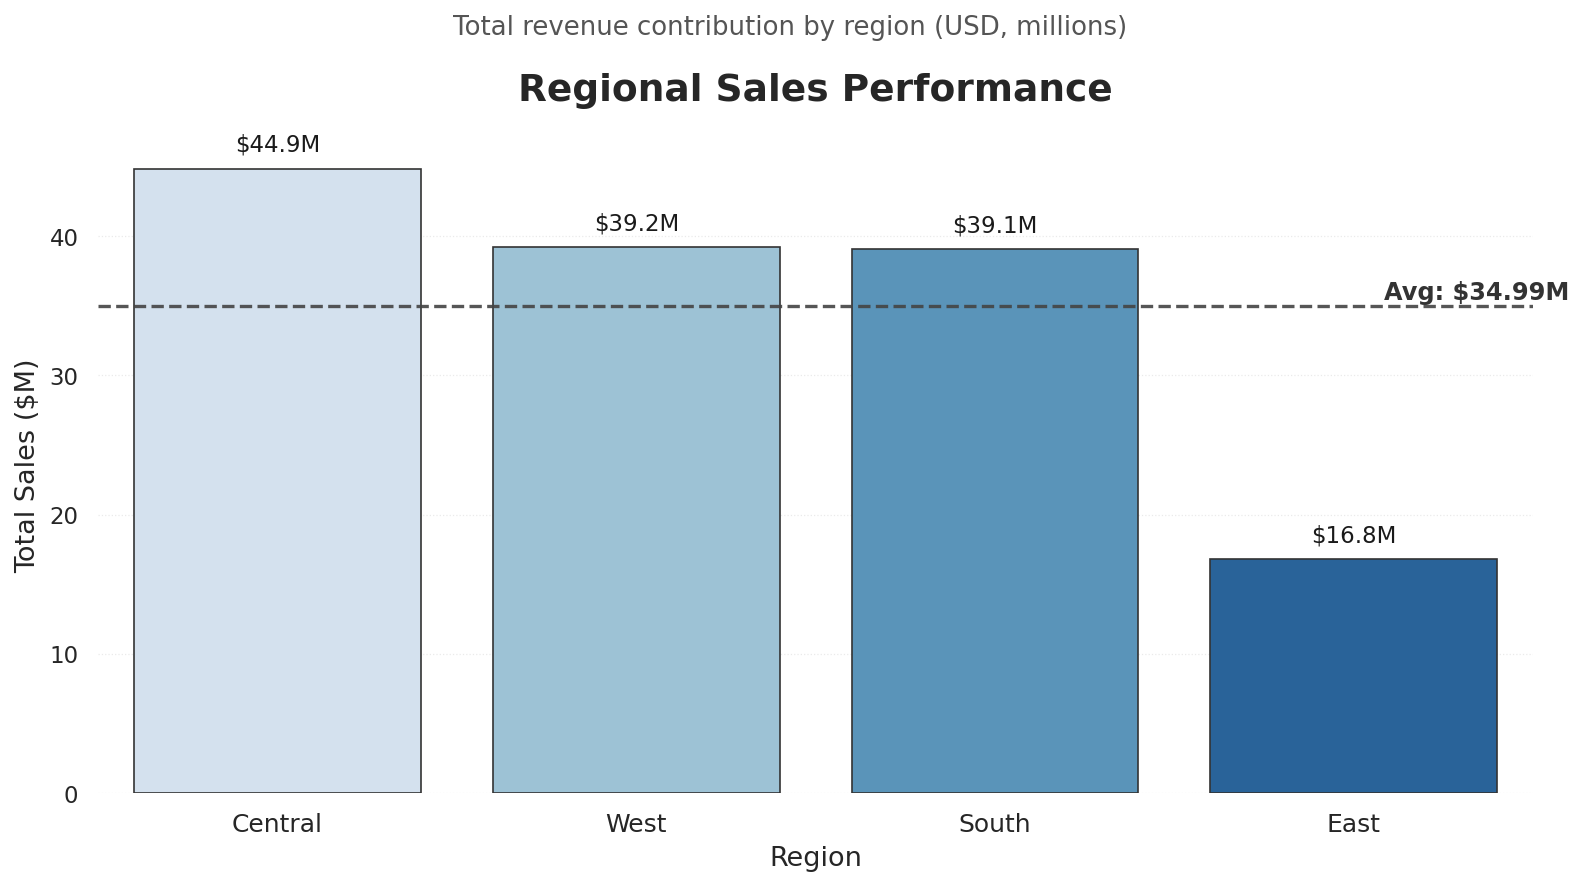

In [15]:
from pyspark.sql.functions import sum as spark_sum, round, col
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ── Aggregate sales by region ────────────────────────────────────────────────
region_sales = (
    df_clean.groupBy("Region")
    .agg(spark_sum("Sales").alias("Total_Sales"))
    .withColumn("Total_Sales_M", round(col("Total_Sales") / 1_000_000, 2))
    .orderBy(col("Total_Sales").desc())
    .toPandas()
)

# Executive metric
avg_sales = region_sales["Total_Sales_M"].mean()

# ── Visual style (executive / boardroom) ─────────────────────────────────────
sns.set_theme(
    style="whitegrid",
    context="notebook",
    rc={
        "axes.titlesize": 18,
        "axes.labelsize": 13,
        "grid.linewidth": 0.6,
        "font.family": "DejaVu Sans"
    }
)

plt.figure(figsize=(11, 6.5), dpi=150)

# Main bar plot
bars = sns.barplot(
    data=region_sales,
    x="Region",
    y="Total_Sales_M",
    palette="Blues",
    edgecolor="#333333",
    linewidth=0.8
)

# Average reference line
plt.axhline(
    avg_sales,
    linestyle="--",
    linewidth=1.6,
    color="#444444",
    alpha=0.9
)
plt.text(
    len(region_sales) - 0.4,
    avg_sales + 0.1,
    f"Avg: ${avg_sales:,.2f}M",
    ha="right",
    va="bottom",
    fontsize=11.5,
    fontweight="semibold",
    color="#333333"
)

# Data labels (clean, non-intrusive)
for bar in bars.patches:
    value = bar.get_height()
    bars.annotate(
        f"${value:,.1f}M",
        (bar.get_x() + bar.get_width() / 2, value),
        xytext=(0, 6),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=11,
        color="#1a1a1a"
    )

# Titles & labels (story-first)
plt.title(
    "Regional Sales Performance",
    fontweight="bold",
    pad=18
)
plt.suptitle(
    "Total revenue contribution by region (USD, millions)",
    fontsize=12.5,
    y=0.93,
    color="#555555"
)

plt.xlabel("Region")
plt.ylabel("Total Sales ($M)")

# Axis cleanup
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)
plt.grid(axis="y", linestyle=":", alpha=0.4)
sns.despine(left=True, bottom=True)

plt.tight_layout(pad=2)

# Export for client deck
plt.savefig(
    "regional_sales_performance_executive.png",
    dpi=320,
    bbox_inches="tight",
    facecolor="white"
)

plt.show()


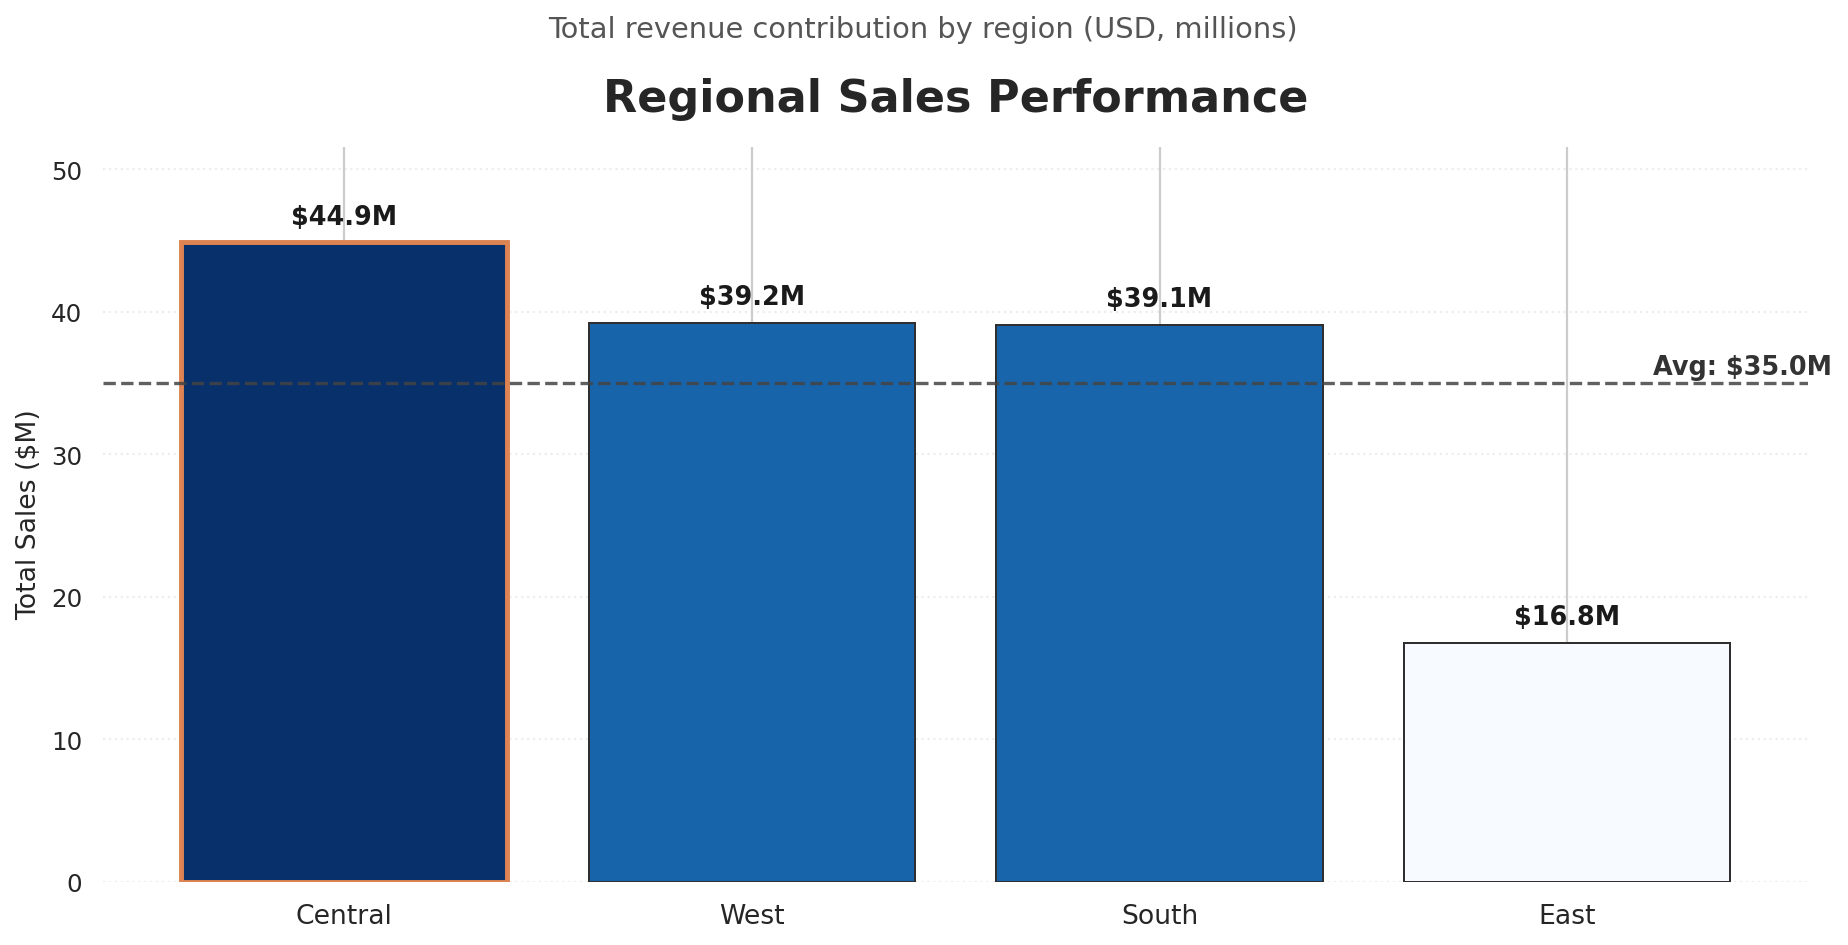

In [16]:
from pyspark.sql.functions import sum as spark_sum, round, col
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ── Aggregate sales by region ────────────────────────────────────────────────
region_sales = (
    df_clean.groupBy("Region")
    .agg(spark_sum("Sales").alias("Total_Sales"))
    .withColumn("Total_Sales_M", round(col("Total_Sales") / 1_000_000, 2))
    .orderBy(col("Total_Sales").desc())
    .toPandas()
)

avg_sales = region_sales["Total_Sales_M"].mean()
max_sales = region_sales["Total_Sales_M"].max()

# Normalize for color intensity
norm = plt.Normalize(region_sales["Total_Sales_M"].min(), max_sales)
colors = plt.cm.Blues(norm(region_sales["Total_Sales_M"]))

# ── Plot ───────────────────────────────────────────────────────────────────
sns.set_theme(style="whitegrid", context="notebook")
plt.figure(figsize=(12, 6.5), dpi=160)

bars = plt.bar(
    region_sales["Region"],
    region_sales["Total_Sales_M"],
    color=colors,
    edgecolor="#2f2f2f",
    linewidth=0.9
)

# Value labels
for bar, value in zip(bars, region_sales["Total_Sales_M"]):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        value + max_sales*0.02,
        f"${value:,.1f}M",
        ha="center",
        va="bottom",
        fontsize=11.5,
        fontweight="semibold",
        color="#1a1a1a"
    )

# Highlight top performer(s) with a subtle glow
top_idx = 0  # index of top region
bars[top_idx].set_edgecolor("#dd8452")
bars[top_idx].set_linewidth(2.2)

# Average line
plt.axhline(avg_sales, linestyle="--", linewidth=1.5, color="#444444", alpha=0.85)
plt.text(len(region_sales)-0.35, avg_sales + 0.2, f"Avg: ${avg_sales:,.1f}M",
         ha="right", va="bottom", fontsize=11.5, fontweight="semibold", color="#333333")

# Titles & labels
plt.title("Regional Sales Performance", fontsize=20, fontweight="bold", pad=16)
plt.suptitle("Total revenue contribution by region (USD, millions)", fontsize=13, y=0.93, color="#555555")
plt.ylabel("Total Sales ($M)")
plt.xlabel("")
plt.ylim(0, max_sales*1.15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

plt.grid(axis="y", linestyle=":", alpha=0.35)
sns.despine(left=True, bottom=True)

plt.tight_layout(pad=2)

# Export
plt.savefig("regional_sales_unique_clean.png", dpi=320, bbox_inches="tight", facecolor="white")
plt.show()


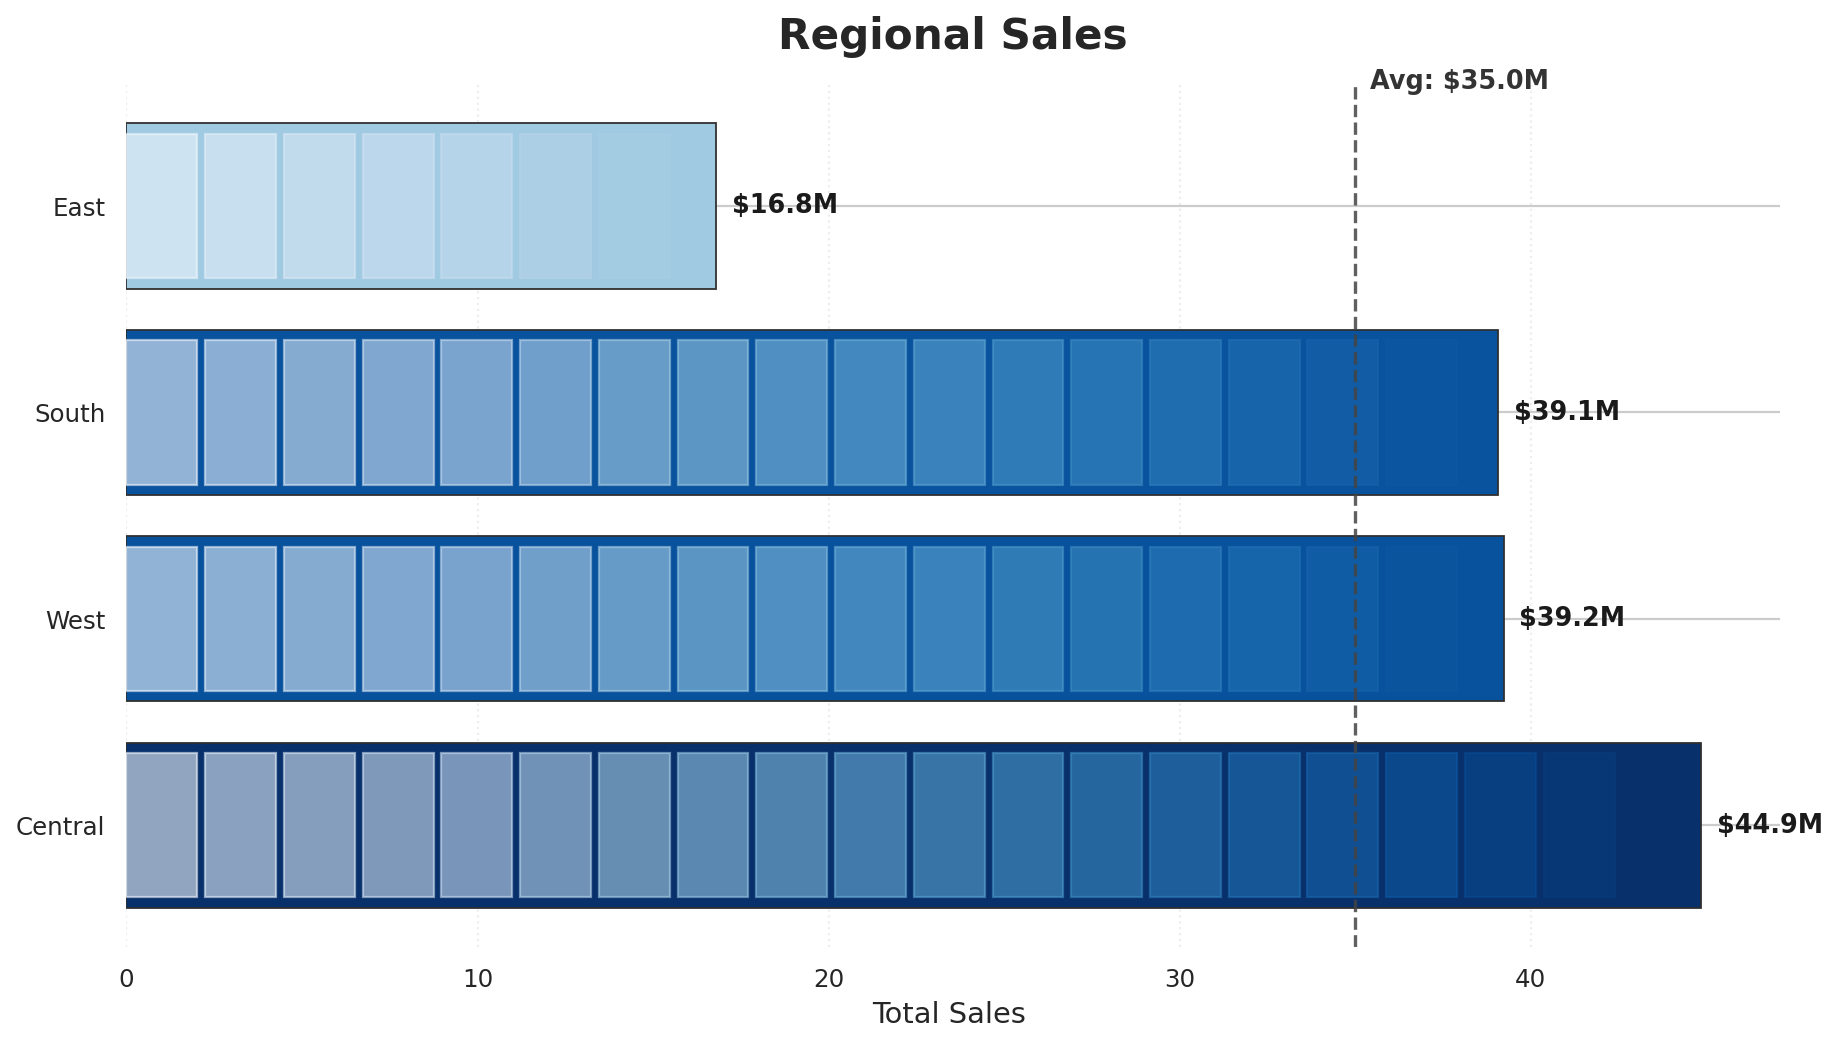

In [17]:
from pyspark.sql.functions import sum as spark_sum, round, col
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ── Aggregate sales by region ────────────────────────────────────────────────
region_sales = (
    df_clean.groupBy("Region")
    .agg(spark_sum("Sales").alias("Total_Sales"))
    .withColumn("Total_Sales_M", round(col("Total_Sales") / 1_000_000, 2))
    .orderBy(col("Total_Sales").desc())
    .toPandas()
)

total_sales = region_sales["Total_Sales_M"].sum()
max_sales = region_sales["Total_Sales_M"].max()
avg_sales = region_sales["Total_Sales_M"].mean()

# Normalize for heatmap gradient
norm = plt.Normalize(0, max_sales)
colors = plt.cm.Blues(norm(region_sales["Total_Sales_M"]))

# ── Horizontal bar chart ───────────────────────────────────────────────────
sns.set_theme(style="whitegrid", context="notebook")
fig, ax = plt.subplots(figsize=(12, 7), dpi=160)

# Horizontal bars
bars = ax.barh(
    region_sales["Region"],
    region_sales["Total_Sales_M"],
    color=colors,
    edgecolor="#2f2f2f",
    linewidth=0.8
)

# Embedded mini heatmap squares along bars
for i, (region, value) in enumerate(zip(region_sales["Region"], region_sales["Total_Sales_M"])):
    num_squares = int(value / max_sales * 20)  # divide bar into up to 20 squares
    for j in range(num_squares):
        ax.add_patch(plt.Rectangle(
            (j * (max_sales/20), i - 0.35),
            width=max_sales/20*0.9,
            height=0.7,
            color=plt.cm.Blues(norm((j+1)*(max_sales/20))),
            alpha=0.6
        ))

    # Label at end of bar
    ax.text(value + max_sales*0.01, i, f"${value:,.1f}M",
            va='center', ha='left', fontsize=11.5, fontweight="semibold", color="#1a1a1a")

# Average line
ax.axvline(avg_sales, linestyle="--", linewidth=1.5, color="#444444", alpha=0.85)
ax.text(avg_sales + max_sales*0.01, len(region_sales)-0.4, f"Avg: ${avg_sales:,.1f}M",
        va='center', ha='left', fontsize=11.5, fontweight="semibold", color="#333333")

# Titles & labels
ax.set_xlabel("Total Sales ", fontsize=13)
ax.set_ylabel("")

plt.title("Regional Sales", fontsize=19, fontweight="bold", pad=16)
#plt.suptitle("Visualizing revenue distribution with gradient representation", fontsize=12.5, y=0.92, color="#555555")

# Grid and styling
ax.grid(axis="x", linestyle=":", alpha=0.35)
sns.despine(left=True, bottom=True)

plt.tight_layout(pad=2)
plt.savefig("regional_sales_horizontal_heatmap.png", dpi=320, bbox_inches="tight", facecolor="white")
plt.show()




---

